# Лабораторная 9. Решение задачи Коши для ОДУ

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Задание 1
Построение ОДУ для теста

Выберем точное решение и произвольное ОДУ
$$u(t) = sin(t)$$
$$u'=(t^2+1)u +f(t)$$
Подставим точное решение, найдем f(t). Получим следующую задачу Коши
$$\left\{ \begin{array}{cl}
u'=(t^2+1)u+cos(t)-(t^2+1)sin(t)\\
u_0=sin(t_0)
\end{array} \right.$$



In [171]:
def f(t, u):
    return (t**2 + 1) * u + np.cos(t) - (t**2 + 1) * np.sin(t)

# Задание 2
Получить численное решение построенной задачи Коши методами Рунге-Кутты и Адамса 4-ых порядков

**Метод Рунге-Кутты 4-этапный**

In [172]:
def runge_kutta(f, u0, a, b, N):
    t = np.linspace(a, b, N)
    tau = t[1] - t[0]

    result = np.zeros((3, N))
    result[0, :] = t  # Узлы сетки
    result[1, 0] = u0 # Вычисленные значения yi
    result[2, 0] = 0  # Погрешность в узлах по правилу Рунге

    y_prev = u0

    for i in range(1, N):
        yi_2 = get_y_rk(f, t[i - 1], t[i], 2, y_prev)
        yi_4 = get_y_rk(f, t[i - 1], t[i], 4, y_prev)

        result[1, i] = yi_2
        result[2, i] = (1/15) * np.abs(yi_2 - yi_4)

        y_prev = yi_2

    return result

def get_y_rk(f, a, b, N, yi):
    t = np.linspace(a, b, N)
    tau = t[1] - t[0]

    y_prev = yi

    for i in range(1, N):
        k1, k2, k3, k4 = get_k(f, tau, t[i - 1], y_prev)

        yi = y_prev + (tau/6) * (k1 + 2*k2 + 2*k3 + k4)
        y_prev = yi

    return y_prev

def get_k(f, tau, ti, yi):
    k1 = f(ti, yi)
    k2 = f(ti + tau/2, yi + tau/2 * k1)
    k3 = f(ti + tau/2, yi + tau/2 * k2)
    k4 = f(ti + tau, yi + tau * k3)

    return k1, k2, k3, k4

**Метод Адамса 4-шаговый**

In [173]:
def adams(f, u0, a, b, N):
    t = np.linspace(a, b, N)
    tau = t[1] - t[0]

    rk_t, rk_y, rk_e = runge_kutta(f, u0, t[0], t[3], 4)

    result = np.zeros((3, N))
    result[0, :] = t          # Узлы сетки
    result[1, :4] = rk_y[:4]  # Вычисленные значения yi
    result[2, :4] = rk_e[:4]  # Погрешность в узлах по правилу Рунге

    for i in range(4, N):
        t_4, y_4 = result[0, i-4:i], result[1, i-4:i]

        yi_2 = get_y_a(f, t[i - 1], t[i], 2, t_4, y_4) # С шагом tau
        yi_4 = get_y_a(f, t[i - 1], t[i], 4, t_4, y_4) # С шагом tau/2

        result[1, i] = yi_2
        result[2, i] = 1/15 * np.abs(yi_2 - yi_4) # Погрешность по правилу Рунге

    return result

def get_y_a(f, a, b, N, t_4, y_4):
    t = np.linspace(a, b, N)
    tau = t[1] - t[0]

    t0, t1, t2, t3 = t_4[::-1]
    y0, y1, y2, y3 = y_4[::-1]
    f0, f1, f2, f3 = f(t0, y0), f(t1, y1), f(t2, y2), f(t3, y3)

    y_prev = y0

    for i in range(1, N):
        yi = y_prev + tau/24 * (55*f0 - 59*f1 + 37*f2 - 9*f3)

        y_prev = yi
        f0, f1, f2, f3 = f(t[i], yi), f0, f1, f2

    return y_prev

In [174]:
y0 = 0
a = 0
b = np.pi
N = 64
t, y_rk, e_rk = runge_kutta(f, y0, a, b, N)
t, y_a, e_a = a_result = adams(f, y0, a, b, N)
u = [np.sin(ti) for ti in t]

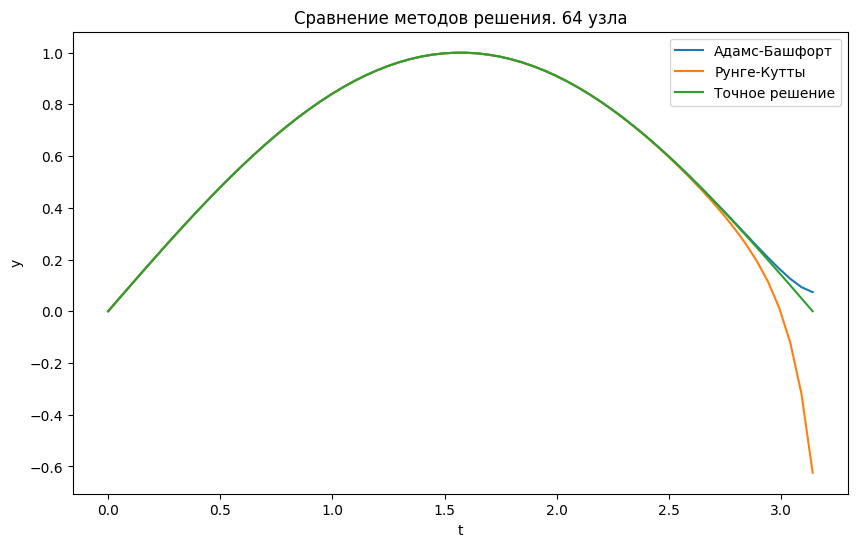

In [175]:
fig = plt.figure(figsize=(10, 6))

plt.title("Сравнение методов решения. 64 узла")
plt.xlabel("t")
plt.ylabel("y")

plt.plot(t, y_rk, label="Адамс-Башфорт")
plt.plot(t, y_a, label="Рунге-Кутты")
plt.plot(t, u, label="Точное решение")
plt.legend()

plt.show()

In [176]:
y0 = 0
a = 0
b = np.pi
N = 128
t, y_rk, e_rk = runge_kutta(f, y0, a, b, N)
t, y_a, e_a = a_result = adams(f, y0, a, b, N)
u = [np.sin(ti) for ti in t]

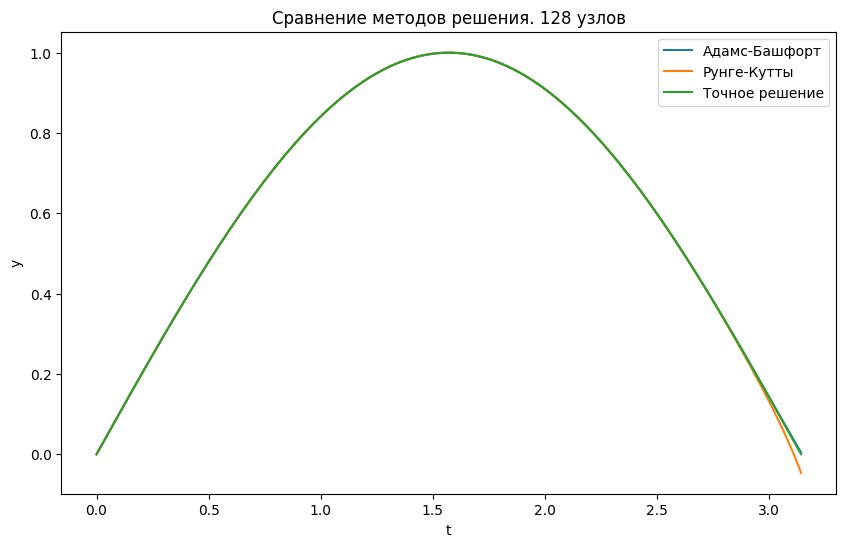

In [177]:
fig = plt.figure(figsize=(10, 6))

plt.title("Сравнение методов решения. 128 узлов")
plt.xlabel("t")
plt.ylabel("y")

plt.plot(t, y_rk, label="Адамс-Башфорт")
plt.plot(t, y_a, label="Рунге-Кутты")
plt.plot(t, u, label="Точное решение")
plt.legend()

plt.show()

In [178]:
y0 = 0
a = 0
b = np.pi
N = 128

t, y_rk, e_rk = runge_kutta(f, y0, a, b, N)
t, y_a, e_a = a_result = adams(f, y0, a, b, N)
u = [np.sin(ti) for ti in t]
abs_a = abs(u - y_a)
abs_rk = abs(u - y_rk)

df = pd.DataFrame({
    "t": t,
    "Знач.": u,
    "Знач. А": y_a,
    "Знач. РК": y_rk,
    "Абс. погр. Адамс": abs_a,
    "Абс. погр. РК": abs_rk,
    "Рунге погр. Адамс": e_a,
    "Рунге погр. РК": e_rk,
})
df.head(10)

,t,Знач.,Знач. А,Знач. РК,Абс. погр. Адамс,Абс. погр. РК,Рунге погр. Адамс,Рунге погр. РК
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.024737,0.024734,0.024734,0.024734,2.755209e-11,2.755209e-11,1.814125e-12,1.814125e-12
2,0.049474,0.049454,0.049454,0.049454,5.251612e-11,5.251612e-11,1.598248e-12,1.598248e-12
3,0.074211,0.074143,0.074143,0.074143,7.509797e-11,7.509797e-11,1.399983e-12,1.399983e-12
4,0.098948,0.098786,0.098786,0.098786,3.302218e-09,9.549218e-11,5.263778e-08,1.218122e-12
5,0.123685,0.123370,0.123370,0.123370,6.708569e-09,1.138821e-10,6.980058e-08,1.051508e-12
6,0.148422,0.147877,0.147877,0.147877,1.010766e-08,1.304396e-10,8.691111e-08,8.990068e-13
7,0.173159,0.172295,0.172295,0.172295,1.361013e-08,1.453245e-10,1.039383e-07,7.594851e-13
8,0.197896,0.196606,0.196606,0.196606,1.719929e-08,1.586841e-10,1.208733e-07,6.318076e-13
9,0.222633,0.220798,0.220798,0.220798,2.087197e-08,1.706519e-10,1.377005e-07,5.147845e-13


# Задание 3
Решение системы ОДУ методом Рунге-Кутты

In [179]:
def f(t, u, v):
    return np.sin(u) * np.cos(v) ** 3

def g(t, u, v):
    return np.cos(u) * np.cos(v)

In [180]:
def runge_kutta_system(f, g, u0, v0, a, b, N):
    t = np.linspace(a, b, N)
    tau = t[1] - t[0]

    result = np.zeros((5, N))
    result[0, :] = t    # Узлы сетки
    result[1, 0] = u0   # Значения u
    result[2, 0] = v0   # Значения v

    y_prev = u0
    w_prev = v0

    for i in range(1, N):
        y_2, w_2 = get_y_rk_system(f, g, t[i - 1], t[i], 2, y_prev, w_prev)
        y_4, w_4 = get_y_rk_system(f, g, t[i - 1], t[i], 4, y_prev, w_prev)

        result[1, i] = y_2
        result[2, i] = w_2

        result[3, i] = (1/15) * abs(y_2 - y_4)
        result[4, i] = (1/15) * abs(w_2 - w_4)

        y_prev = y_2
        w_prev = w_2

    return result

def get_y_rk_system(f, g, a, b, N, y_prev, w_prev):
    t = np.linspace(a, b, N)
    tau = t[1] - t[0]

    y = y_prev
    w = w_prev

    for i in range(1, N):
        k1_y, k2_y, k3_y, k4_y, k1_w, k2_w, k3_w, k4_w = get_k_system(f, g, tau, t[i - 1], y, w)

        y = y + (tau/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
        w = w + (tau/6) * (k1_w + 2*k2_w + 2*k3_w + k4_w)

    return y, w

def get_k_system(f, g, tau, t, u, v):
    k1_y, k1_w = f(t + tau, u, v), g(t + tau, u, v)
    k2_y, k2_w = f(t + tau/2, u + tau/2 * k1_y, v + tau/2 * k1_w), g(t + tau/2, u + tau/2 * k1_y, v + tau/2 * k1_w)
    k3_y, k3_w = f(t + tau/2, u + tau/2 * k2_y, v + tau/2 * k2_w), g(t + tau/2, u + tau/2 * k2_y, v + tau/2 * k2_w)
    k4_y, k4_w = f(t + tau, u + tau * k3_y, v + tau * k3_w), g(t + tau, u + tau * k3_y, v + tau * k3_w)
    return k1_y, k2_y, k3_y, k4_y, k1_w, k2_w, k3_w, k4_w

# Задание 4
Решение системы ОДУ методом Адамса

In [181]:
def adams_system(f, g, u0, v0, a, b, N):
    t = np.linspace(a, b, N)
    tau = t[1] - t[0]

    rk_t, rk_u, rk_v, rk_e_u, rk_e_v = runge_kutta_system(f, g, u0, v0, t[0], t[3], 4)

    result = np.zeros((5, N))
    result[0, :] = t           # Узлы сетки
    result[1, :4] = rk_u[:4]   # Значения u
    result[2, :4] = rk_v[:4]   # Значения v
    result[3, :4] = rk_e_u[:4] # Погрешность u в узлах по правилу Рунге
    result[4, :4] = rk_e_v[:4] # Погрешность v в узлах по правилу Рунге

    for i in range(4, N):
        t_4 = result[0, i-4:i]
        u_4 = result[1, i-4:i]
        v_4 = result[2, i-4:i]

        u_2, v_2 = get_y_a_system(f, g, t[i-1], t[i], 2, t_4, u_4, v_4)
        u_4, v_4 = get_y_a_system(f, g, t[i-1], t[i], 4, t_4, u_4, v_4)

        result[1, i] = u_2
        result[2, i] = v_2
        result[3, i] = (1/15) * np.abs(u_2 - u_4)
        result[4, i] = (1/15) * np.abs(v_2 - v_4)

    return result

def get_y_a_system(f, g, a, b, N, t_4, u_4, v_4):
    t_sub = np.linspace(a, b, N)
    tau = t_sub[1] - t_sub[0]

    t0, t1, t2, t3 = t_4[::-1]
    u0, u1, u2, u3 = u_4[::-1]
    v0, v1, v2, v3 = v_4[::-1]

    f0, f1, f2, f3 = f(t0, u0, v0), f(t1, u1, v1), f(t2, u2, v2), f(t3, u3, v3)
    g0, g1, g2, g3 = g(t0, u0, v0), g(t1, u1, v1), g(t2, u2, v2), g(t3, u3, v3)

    u_prev = u0
    v_prev = v0

    for i in range(1, N):
        u_next = u_prev + tau/24 * (55*f0 - 59*f1 + 37*f2 - 9*f3)
        v_next = v_prev + tau/24 * (55*g0 - 59*g1 + 37*g2 - 9*g3)

        u_prev = u_next
        v_prev = v_next

        f_next = f(t_sub[i], u_next, v_next)
        g_next = g(t_sub[i], u_next, v_next)

        f0, f1, f2, f3 = f_next, f0, f1, f2
        g0, g1, g2, g3 = g_next, g0, g1, g2

    return u_prev, v_prev

# Задание 5

In [182]:
a = 1
b = 3
u0 = 0.5
v0 = -0.5
N = 256

t_rk, y_rk, w_rk, ey_rk, ew_rk = runge_kutta_system(f, g, u0, v0, a, b, N)
t_a, y_a, w_a, ey_a, ew_a = adams_system(f, g, u0, v0, a, b, N)

In [183]:
df = pd.DataFrame({
    "t": t_rk,
    "Значение u Адамс": y_a,
    "Значение u РК": y_rk,
    "Значение v Адамс": w_a,
    "Значение v РК": w_rk,
    "Рунге погр. u Адамс": ey_a,
    "Рунге погр. u РК": ey_rk,
    "Рунге погр. v Адамс": ew_a,
    "Рунге погр. v РК": ew_rk,
})
df.head(10)

,t,Значение u Адамс,Значение u РК,Значение v Адамс,Значение v РК,Рунге погр. u Адамс,Рунге погр. u РК,Рунге погр. v Адамс,Рунге погр. v РК
0,1.000000,0.500000,0.500000,-0.500000,-0.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.007843,0.502560,0.502560,-0.493954,-0.493954,1.798561e-15,1.798561e-15,3.378779e-15,3.378779e-15
2,1.015686,0.505157,0.505157,-0.487897,-0.487897,1.761554e-15,1.761554e-15,3.408385e-15,3.408385e-15
3,1.023529,0.507792,0.507792,-0.481829,-0.481829,1.717145e-15,1.717145e-15,3.441691e-15,3.441691e-15
4,1.031373,0.510465,0.510465,-0.475750,-0.475750,4.597194e-08,1.680138e-15,1.303652e-08,3.474998e-15
5,1.039216,0.513176,0.513176,-0.469662,-0.469662,4.634958e-08,1.650532e-15,1.252929e-08,3.497203e-15
6,1.047059,0.515926,0.515926,-0.463564,-0.463564,4.672157e-08,1.606123e-15,1.201369e-08,3.545312e-15
7,1.054902,0.518714,0.518714,-0.457458,-0.457458,4.708754e-08,1.583918e-15,1.148982e-08,3.582320e-15
8,1.062745,0.521542,0.521542,-0.451342,-0.451342,4.744718e-08,1.554312e-15,1.095768e-08,3.619327e-15
9,1.070588,0.524409,0.524409,-0.445219,-0.445219,4.780018e-08,1.524706e-15,1.041734e-08,3.663736e-15


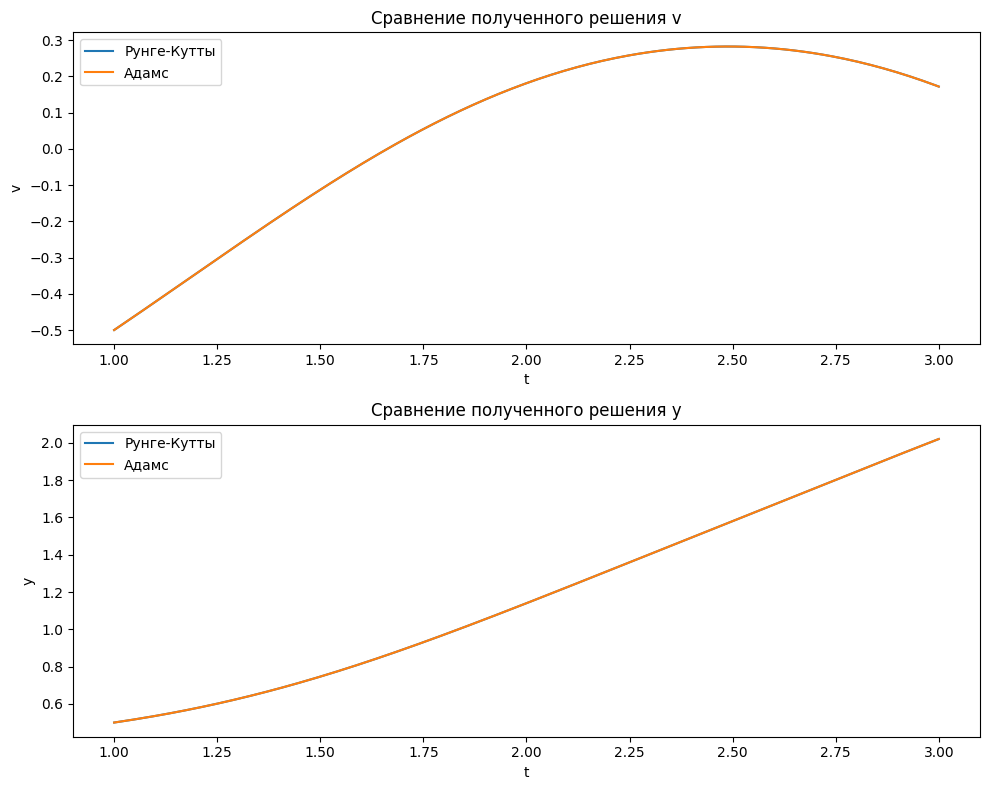

In [184]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].set_title("Сравнение полученного решения v")
axs[0].set_xlabel("t")
axs[0].set_ylabel("v")
axs[0].plot(t_rk, w_rk, label="Рунге-Кутты")
axs[0].plot(t_rk, w_a, label="Адамс")
axs[0].legend()

axs[1].set_title("Сравнение полученного решения y")
axs[1].set_xlabel("t")
axs[1].set_ylabel("y")
axs[1].plot(t_rk, y_rk, label="Рунге-Кутты")
axs[1].plot(t_rk, y_a, label="Адамс")
axs[1].legend()

plt.tight_layout()
plt.show()